<h1> Applied Data Science

Name: Chaitanya Shah<br>
Columbia uni: css2211

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from LeXmo import LeXmo
import nltk
nltk.download('punkt')
import time
import random
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/css2211/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/css2211/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Loading Data

In [3]:
df = pd.read_csv('/Users/css2211/Projects/Applied-Data-Science/Project1/data/philosophy_data.csv')

# 2. EDA

## 2.1 Understanding the Data

As a start I would first like to first understand the data.
Specifically, what are the columns, what is the each type of each columns, what does each column specifiy, what is the size of the total data set.

In [149]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


The columns in the dataset are:

In [173]:
pp.pprint(df.columns)

Index(['title', 'author', 'school', 'sentence_spacy', 'sentence_str',
       'original_publication_date', 'corpus_edition_date', 'sentence_length',
       'sentence_lowered', 'tokenized_txt', 'lemmatized_str'],
      dtype='object')


The distinct type of schools are:

In [174]:
pp.pprint(set(df.school))

{   'analytic',
    'aristotle',
    'capitalism',
    'communism',
    'continental',
    'empiricism',
    'feminism',
    'german_idealism',
    'nietzsche',
    'phenomenology',
    'plato',
    'rationalism',
    'stoicism'}


The distinct type of authors are:

In [178]:
pp.pprint(set(df.author))

{   'Aristotle',
    'Beauvoir',
    'Berkeley',
    'Davis',
    'Deleuze',
    'Derrida',
    'Descartes',
    'Epictetus',
    'Fichte',
    'Foucault',
    'Hegel',
    'Heidegger',
    'Hume',
    'Husserl',
    'Kant',
    'Keynes',
    'Kripke',
    'Leibniz',
    'Lenin',
    'Lewis',
    'Locke',
    'Malebranche',
    'Marcus Aurelius',
    'Marx',
    'Merleau-Ponty',
    'Moore',
    'Nietzsche',
    'Plato',
    'Popper',
    'Quine',
    'Ricardo',
    'Russell',
    'Smith',
    'Spinoza',
    'Wittgenstein',
    'Wollstonecraft'}


### 2.2 Type of Mapping between Authors and School

In [146]:
for i in set(df.school):
    print(i)
    df2 = df[df.school==i]
    print(set(df2.author))
    print()

analytic
{'Wittgenstein', 'Quine', 'Lewis', 'Moore', 'Popper', 'Russell', 'Kripke'}

rationalism
{'Spinoza', 'Descartes', 'Malebranche', 'Leibniz'}

communism
{'Lenin', 'Marx'}

plato
{'Plato'}

capitalism
{'Ricardo', 'Keynes', 'Smith'}

german_idealism
{'Kant', 'Hegel', 'Fichte'}

feminism
{'Davis', 'Wollstonecraft', 'Beauvoir'}

phenomenology
{'Merleau-Ponty', 'Husserl', 'Heidegger'}

aristotle
{'Aristotle'}

stoicism
{'Epictetus', 'Marcus Aurelius'}

nietzsche
{'Nietzsche'}

empiricism
{'Locke', 'Berkeley', 'Hume'}

continental
{'Derrida', 'Foucault', 'Deleuze'}



It's clear from the above data that each shool has each various authors so we have One to Many mapping between School and Authors, i.e One school is mapped to many schools

### 2.3 Word Cloud

I want to first analyze the word cloud of each school and see if there is some obvious similarity.

I also want to see if the word cloud contains the common words we associate with each school, like for example money with capitalism, women  with Feminism and so on

analytic


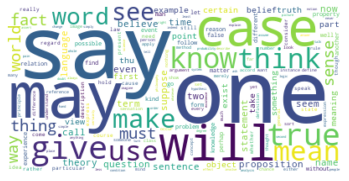

rationalism


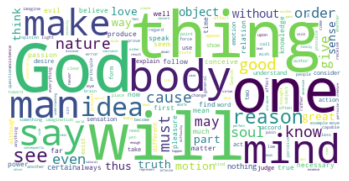

communism


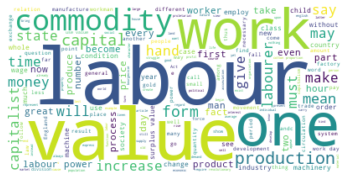

plato


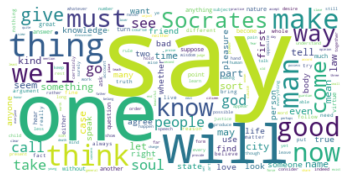

capitalism


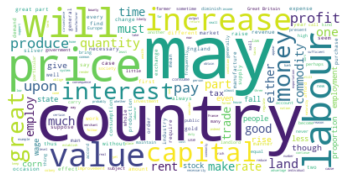

german_idealism


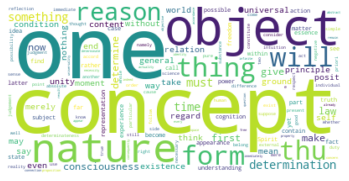

feminism


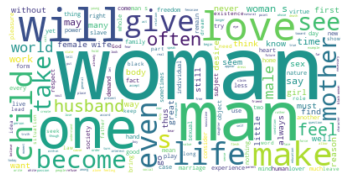

phenomenology


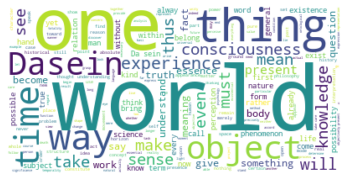

aristotle


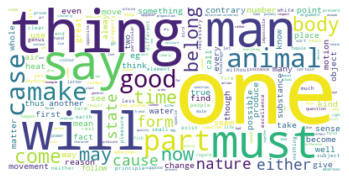

stoicism


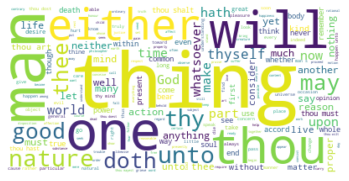

nietzsche


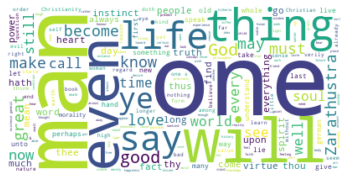

empiricism


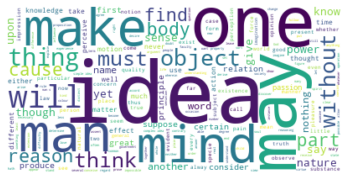

continental


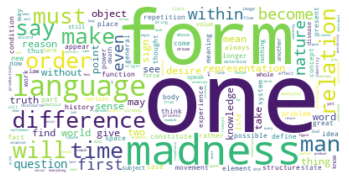

In [314]:
list_schools = list(set(df.school))
for school in list_schools:
    print(school)
    df_school = df[df.school == school]
    text = " ".join(review for review in df_school.lemmatized_str)
    stopwords = set(STOPWORDS)
    stopwords.update(["PRON"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

From the above word graphs, the top words do coincide with our general idea of each type of school

### 2.4 Word Cloud change with Time for each author

I want to see if the word cloud changes drastically over the years for the same author. The assumption is that over the years the word cloud might change.

In [311]:
list_author = list(set(df.author))
for author in list_author:
    print(author)
    df_author = df[df.author == author]
    years = sorted(list(set(df_author.original_publication_date)))
    print(years)

Keynes
[1936]
Lewis
[1985]
Moore
[1910]
Merleau-Ponty
[1945]
Locke
[1689]
Marcus Aurelius
[170]
Foucault
[1961, 1963, 1966]
Wollstonecraft
[1792]
Russell
[1912, 1921]
Aristotle
[-320]
Descartes
[1637, 1641]
Spinoza
[1677]
Heidegger
[1927, 1950]
Leibniz
[1710]
Popper
[1959]
Beauvoir
[1949]
Fichte
[1798]
Davis
[1981]
Plato
[-350]
Hegel
[1807, 1817, 1820]
Marx
[1848, 1883]
Malebranche
[1674]
Deleuze
[1968, 1972]
Kripke
[1972, 1975]
Smith
[1776]
Wittgenstein
[1921, 1950, 1953]
Lenin
[1862]
Berkeley
[1710, 1713]
Hume
[1739, 1779]
Quine
[1950]
Husserl
[1907, 1936]
Kant
[1781, 1788, 1790]
Epictetus
[125]
Derrida
[1967]
Ricardo
[1817]
Nietzsche
[1886, 1887, 1888]


Since Wittgenstein has the most spread out years, I can see if the word count changes with time for this author

In [316]:
max_words_dic={}
for author in ['Wittgenstein']:
    print(author)
    print('-------------')
    df_author = df[df.author == author]
    years = sorted(list(set(df_author.original_publication_date)))
    for year in years:
        print(year)
        df_author_year = df_author[df_author.original_publication_date == year]
        text = " ".join(review for review in df_author_year.lemmatized_str)
        stopwords = set(STOPWORDS)
        stopwords.update(["PRON"])
        dic={}
        for sentence in df_author_year.lemmatized_str:
            words = sentence.split(" ")
            for word in words:
                word = word.replace("-","").replace("'","").replace("]","").replace("[","").replace(",","")
                if word not in stopwords and len(word)>1:
                    if word not in dic:
                        dic[word] = 1
                    else:
                        dic[word] += 1
        words = sorted(dic.items(), key = lambda item:item[1], reverse = True)
        ctr=0
        max_words = []
        for word in words:
            if ctr>20:
                break
            max_words.append(word[0])
            ctr+=1
        max_words_dic[year] = max_words
        print(max_words)
        print()
        #print(words)
        
        

Wittgenstein
-------------
1921
['proposition', 'one', 'sign', 'form', 'logical', 'say', 'must', 'sense', 'truth', 'logic', 'world', 'object', 'fact', 'picture', 'give', 'way', 'another', 'elementary', 'mean', 'thing', 'express']

1950
['know', 'say', 'one', 'doubt', 'may', 'believe', 'make', 'proposition', 'someone', 'certain', 'mistake', 'something', 'mean', 'hand', 'thing', 'game', 'now', 'word', 'learn', 'whether', 'language']

1953
['say', 'one', 'word', 'mean', 'use', 'see', 'may', 'language', 'now', 'know', 'something', 'make', 'picture', 'think', 'look', 'someone', 'game', 'thing', 'case', 'way', 'give']



Overall it is not very clear looking just at this.

Wittgenstein
-------------
1921


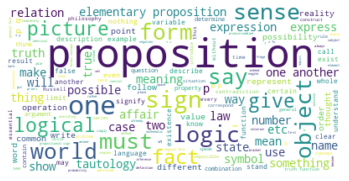

1950


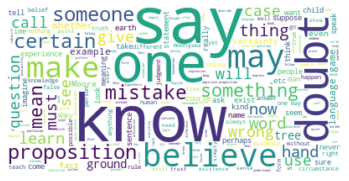

1953


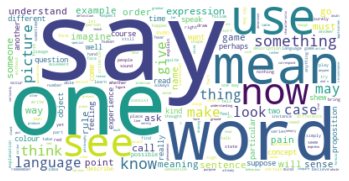

In [317]:
for author in ['Wittgenstein']:
    print(author)
    print('-------------')
    df_author = df[df.author == author]
    years = sorted(list(set(df_author.original_publication_date)))
    for year in years:
        print(year)
        df_author_year = df_author[df_author.original_publication_date == year]
        text = " ".join(review for review in df_author_year.lemmatized_str)
        stopwords = set(STOPWORDS)
        stopwords.update(["PRON"])

        # Generate a word cloud image
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    

Overall the word count word cloud is more similar in 1950 and 1953 then in 1921, which makes sense and also proves my assumtion

# 3. Emotion Analysis on the data set

## 3.1 Emotions across School

The most interesting thing that I would like to decipher from the data is to see if there are specific emotions associated with each school of thought. 

The idea is to compare and see if the emotions we decipher from the data match with what we usually associate with the school of thought.
For this analysis I am going to compare schools that I am familiar with which are :

In [4]:
schools = ['analytic', 'feminism', 'rationalism', 'capitalism', 'communism' , 'stoicism']
schools

['analytic', 'feminism', 'rationalism', 'capitalism', 'communism', 'stoicism']

The empotions that I plan to extract from the data are: 

In [5]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
print(emotions)

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']


In [6]:
for i in set(df.school):
    df2 = df[df.school==i]
    print(i + ": " + str(len(df2)))

nietzsche: 13548
communism: 17958
analytic: 55425
continental: 33779
rationalism: 22949
empiricism: 19931
phenomenology: 28573
capitalism: 18194
german_idealism: 42136
aristotle: 48779
stoicism: 2535
feminism: 18635
plato: 38366


Since the count of texts of each school is different, to avoid any bias, we will randomly select a fixed number of paragraphs from each school. 
It would be computationally expensive to run the analysis on the whole dataset and hence we will creatre a sample of 100 paragraphs and resmple 25 times and then calculate the stats.
I will consider the school of thoughts which I am familiar with and clearly understand what they represent which are analytic, feminism, rationalism,capitalism, communism and stoicism.

In [ ]:
#@title

dic_school = {}
ts = time.time()

for school in schools:
    dic = {}
    for _ in range(25):
        #print(school)
        df2 = df[df.school == school]
        randomlist = random.sample(range(0, len(df2)), 50)
        for indx in randomlist:
            sentence = df2.iloc[indx]['sentence_lowered']
            emo=LeXmo.LeXmo(sentence)
            emo.pop('text', None)
            for key in emo:
                if key not in dic:
                    dic[key] = [emo[key]]
                else:
                    dic[key].append(emo[key])
    dic_school[school] = dic
    #print(dic_school)
ts2 = time.time()

In [ ]:
ts2-ts

In [106]:
# for school in dic_school:
#     file = school + ".csv"
#     with open(file, 'w') as f:
#         for key in dic_school[school].keys():
#             f.write("%s,%s\n"%(key,dic_school[school][key]))

### Analytic School

The ussual emotion that I would associate with the school would be Trust and Positive. And I would not associate the suprise emotion with this school.

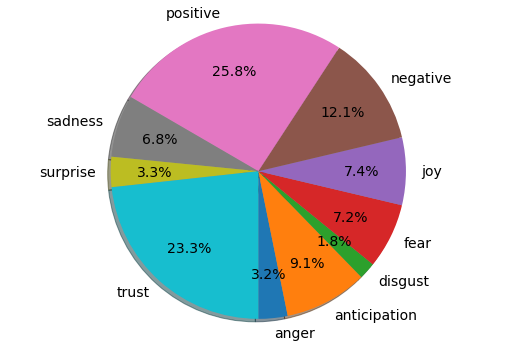

In [149]:
school = 'analytic'
dic2 = {}
for emot in emotions:
    #print(emot)
    #print(sum(dic_school['analytic'][emot])/len(dic_school['analytic']))
    dic2[emot] = sum(dic_school[school][emot])/len(dic_school[school])
#     for i in dic2:
#         print(i, 100 * dic2[i]/sum(dic2.values()))
print()
labels = []
sizes = []
for x, y in dic2.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()
plt.savefig("Users/css2211/Projects/fall2022-project1-Chaitanya1011/analytical_vs_emotion.png")

Based on the above data, it can be seen that my assumption(understnading) about Analytic school is correct. But it is interesting to see that negative has the 3rd highest proportion something I would not associate with Analytical school

### Rationalism School

The ussual emotion that I would associate with the school would be Positive

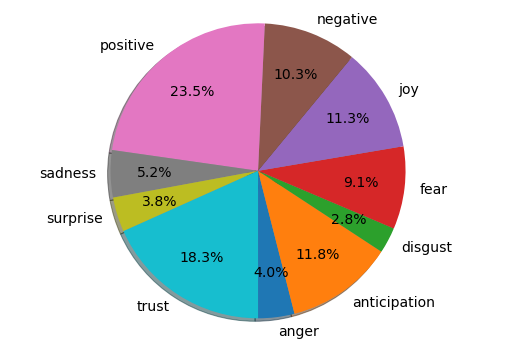

In [150]:
school = 'rationalism'
dic2 = {}
for emot in emotions:
    #print(emot)
    #print(sum(dic_school['analytic'][emot])/len(dic_school['analytic']))
    dic2[emot] = sum(dic_school[school][emot])/len(dic_school[school])
#     for i in dic2:
#         print(i, 100 * dic2[i]/sum(dic2.values()))
print()
labels = []
sizes = []
for x, y in dic2.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

It is interesting to see that positive emotion is a major proportion followed by trust(my assumption) and joy. Joy is not something I would associate with Rationalism school

### Feminism School

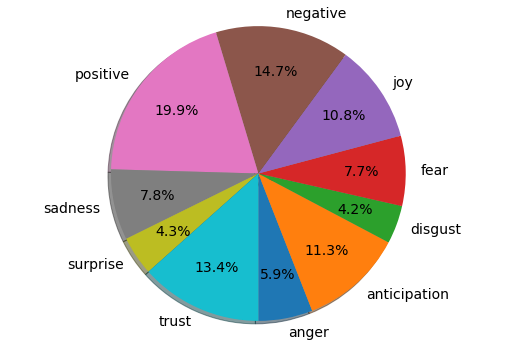

In [161]:
school = 'feminism'
dic2 = {}
for emot in emotions:
    #print(emot)
    #print(sum(dic_school['analytic'][emot])/len(dic_school['analytic']))
    dic2[emot] = sum(dic_school[school][emot])/len(dic_school[school])
#     for i in dic2:
#         print(i, 100 * dic2[i]/sum(dic2.values()))
print()
labels = []
sizes = []
for x, y in dic2.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

It is interesting to see that positive emotion is a major proportion followed by negative and trust. I feel the negative emotion is one of the major proportion because the texts might be filled about incidents 

### Capitalism School

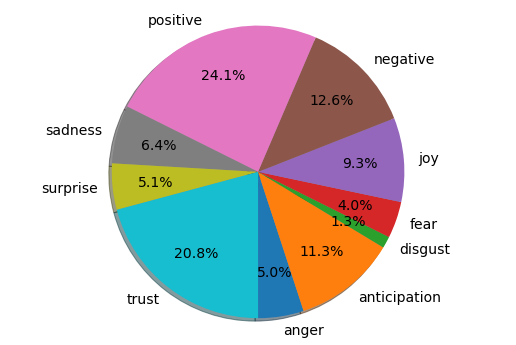

In [160]:
school = 'capitalism'
dic2 = {}
for emot in emotions:
    #print(emot)
    #print(sum(dic_school['analytic'][emot])/len(dic_school['analytic']))
    dic2[emot] = sum(dic_school[school][emot])/len(dic_school[school])
#     for i in dic2:
#         print(i, 100 * dic2[i]/sum(dic2.values()))
print()
labels = []
sizes = []
for x, y in dic2.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

It is interesting to see that positive and trust are the major proportion with no one in the vicinity. 

It would be more clear if we compare schools across emotion rather than the other way around.

## 3.2 Schools across Emotion

In [297]:
dic_new_school = {}

sum_school = {}
for school in schools:
    temp = 0 
    for emotion in emotions:
        temp += sum(dic_school[school][emotion])
    sum_school[school] = temp
    
for school in schools:
    #print(school)
    temp = []
    for emotion in emotions:
        #print(sum(dic_school[school][emotion]))
        dic_new_school[school,emotion] = sum(dic_school[school][emotion])/sum_school[school]

In [298]:
dic_emotion = {}
for emotion in emotions:
    dic = {}
    for school in schools:
        dic[school] = dic_new_school[school,emotion]
    dic_emotion[emotion] = dic

In [299]:
# dic_emotion = {}
# sum_school = {}
# for school in schools:
#     temp = 0 
#     for emotion in emotions:
#         temp += sum(dic_school[school][emotion])
#     sum_school[school] = temp
    
# for emotion in emotions:
#     dic = {}
#     for school in schools:
#         dic[school] =  sum(dic_school[school][emotion])/sum_school[school]
#     dic3={}
#     for i in dic:
#         dic3[i] = 100 * dic[i]/sum(dic2.values())
#     dic_emotion[emotion] = dic3

### Anger

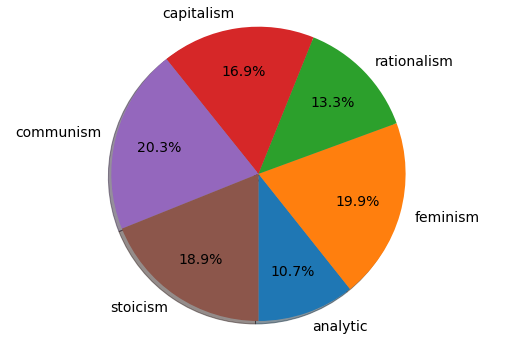

In [300]:
emotion = 'anger'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

I feel the higher propotion of anger being in Communism and Feminism can be reasoned with the idea the texts in this schools moght be focussed on the feelings of oppressed people.

### Disgust

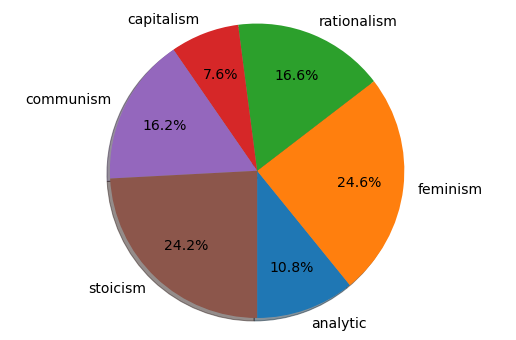

In [302]:
emotion = 'disgust'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

I feel the higher propotion of disgust being in Feminism can be attributed to the fact that texts might be focused on feeling disgusted of not being treated equally.

It is interesting to see that stoicism is also a major proportion and I cannot think of a reason to justify that.

### Surprise

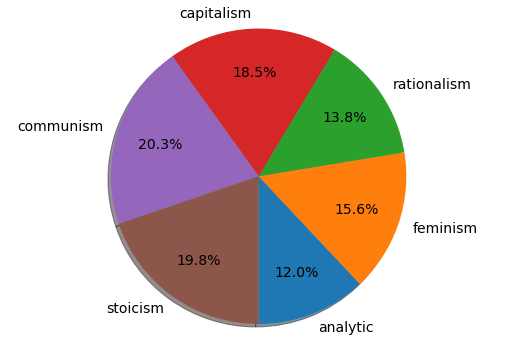

In [310]:
emotion = 'surprise'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

The highest proportion of suprise in Communism can be reasoned to the fact that the texts might be focussed on how the communism ins established and how it workds

### Joy

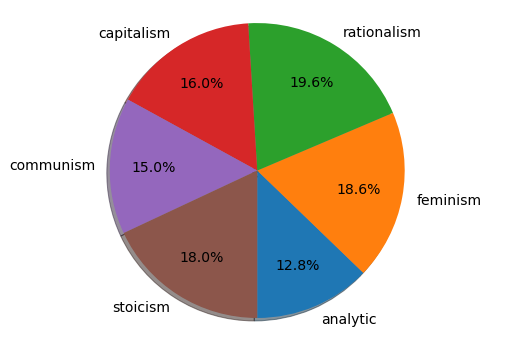

In [304]:
emotion = 'joy'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

It is interesting to see that rationalism has the most proportion of joy and analytic has the least proportion and I cannot think of a reason to justify that.

### Sadness

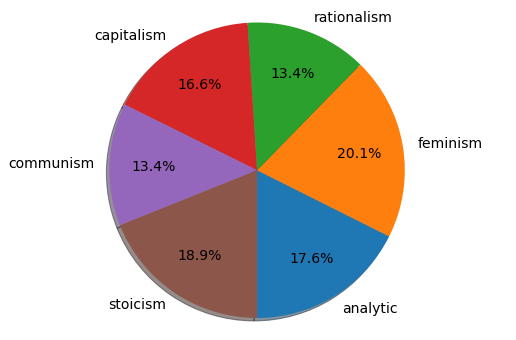

In [306]:
emotion = 'sadness'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

I feel the higher propotion of sadness being in Feminism can be attributed to the fact that texts might be focused on feeling disgusted of not being treated equally.

It is interesting to see that stoicism is also a major proportion and I cannot think of a reason to justify that.

### Trust

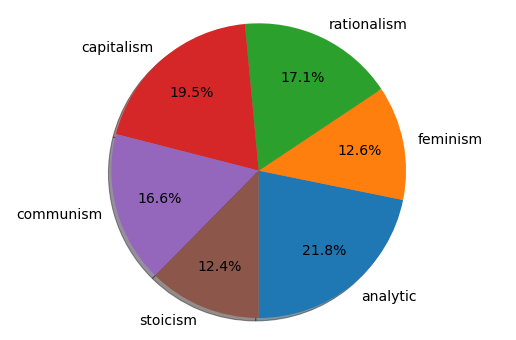

In [311]:
emotion = 'trust'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

The highest proportion of trust being in analytic school can be reasoned with the idea that analytic school is based on the value of making decisions based on facts and the texts might have more words describing trust

The higher proportion of trust in capitalism is also interesting

### Negative

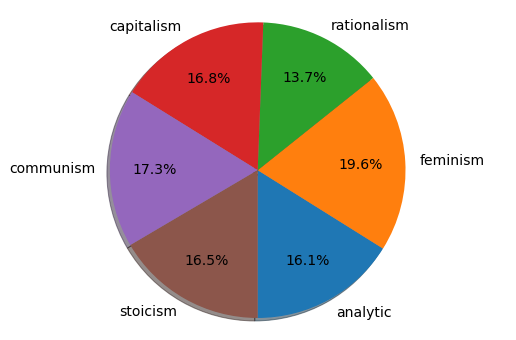

In [308]:
emotion = 'negative'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

All the shools are more or less evenly poised

### Positive

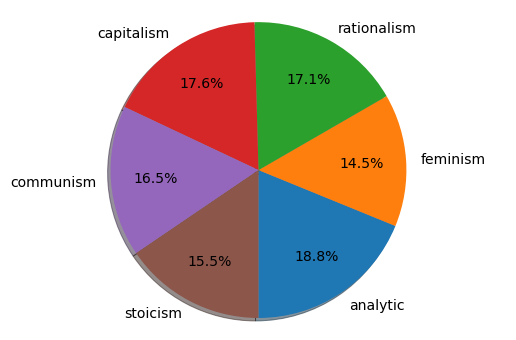

In [309]:
emotion = 'positive'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

All the schools are more or less evenly poised

### Positive

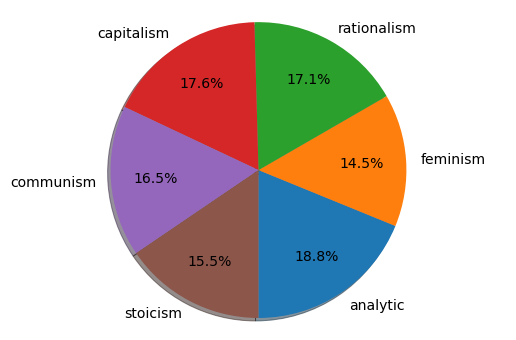

In [309]:
emotion = 'positive'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

All the schools are more or less evenly poised

### Positive

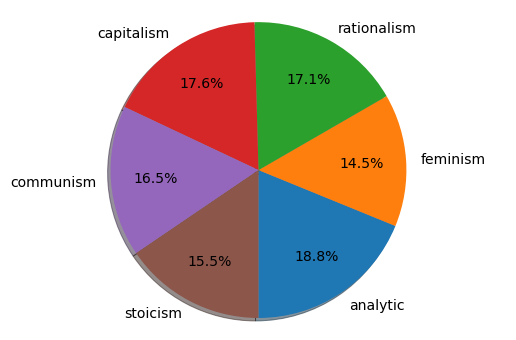

In [309]:
emotion = 'positive'
labels = []
sizes = []
for x, y in dic_emotion[emotion].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize = (9,6))
plt.pie(sizes, autopct='%1.1f%%',labels=labels,pctdistance=0.7,startangle = 270, normalize= True,labeldistance=1.1,shadow = True,textprops={'fontsize': 14})
plt.axis('equal') 
plt.show()

All the schools are more or less evenly poised

# 4. Conclusion

It is difficult to conclude anything with certaninity but we can comment about the type of texts in each school based on the emotion derived for each school

Feminism: The texts are more focussed on the defintion and history of Feminism<br>
Stocism: The texts are more focuseed on the benefits of stocism and how to achieve it<br>
Communism: The texts are more focussed on the feelings of the people living under a Communist regime<br>

I cannot comment about other school based on the analysis done till now. 

It is intersting to see the higher and lower proportion of differnt emotions in few schools. It would be interesting to dig further in the library and see what exactly is the reason behind it

# 5. Potential Issues

## 5.1 Multiple authors for each school

One of the potential problem with the analysis is that I am assuming that each author in every school of thought has the same way of writing and same opinion. It could be that Ricardo author in Capitalism might be explaining the history where as Smith in the same school might be talking about the drawbacks of capitalism

## 5.2 Small Random Sampling

To have a lower time compeleixty I ran a small sampling to find emotions across schools. It could be missing out important texts when randomly sampled.

## 5.3 LeXmo Library

I have only used 1 library for emtoion analysis and I haven't seen the source code of the library and hence if somehting is wrong in my understanding of the library and thereby in my implementation, the results might be different as well.